<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/model_eval_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
results = pd.read_csv('https://raw.githubusercontent.com/a-nagar/cs4372/refs/heads/main/data/model-results.csv')

In [ ]:
results.head()

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


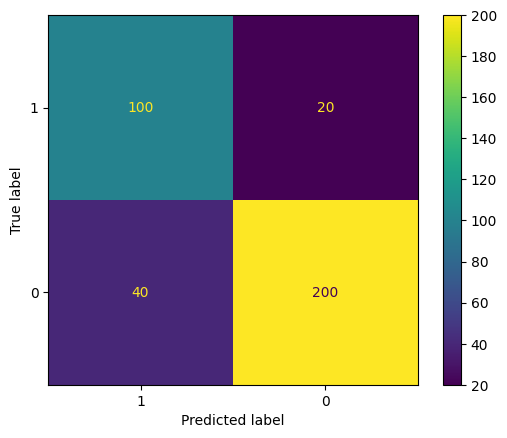

In [ ]:
# Create confusion matrix using the actual and predicted columns from results
cm_results = confusion_matrix(results['actual'], results['predicted'], labels=[1, 0])

# Display the confusion matrix with actual labels, but the order should be [1, 0] i.e. positive class first
ConfusionMatrixDisplay(cm_results, display_labels=[1, 0]).plot()
plt.show()

In [ ]:
print(classification_report(results['actual'], results['predicted'], digits=4))

              precision    recall  f1-score   support

           0     0.9091    0.8333    0.8696       240
           1     0.7143    0.8333    0.7692       120

    accuracy                         0.8333       360
   macro avg     0.8117    0.8333    0.8194       360
weighted avg     0.8442    0.8333    0.8361       360



In [ ]:
roc = pd.read_csv('https://raw.githubusercontent.com/a-nagar/cs4372/refs/heads/main/data/roc.csv')

In [ ]:
roc.head()

,pred_prob,actual
0,0.95,1
1,0.93,1
2,0.87,0
3,0.85,1
4,0.82,0


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(roc['actual'], roc['pred_prob'])
roc_auc = auc(fpr, tpr)
roc_auc

0.6000000000000001

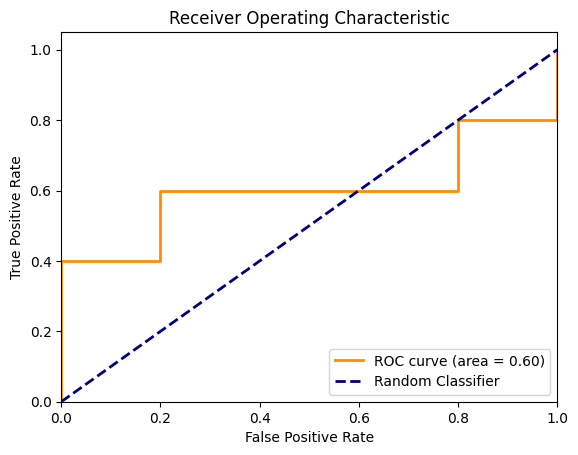

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
roc_disease = pd.read_csv('https://raw.githubusercontent.com/a-nagar/cs4372/refs/heads/main/data/roc_disease.csv')

In [ ]:
roc_disease.head()

,actual,pred_prob
0,1,0.9
1,1,0.8
2,0,0.7
3,1,0.6
4,0,0.5


In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(roc_disease['actual'], roc_disease['pred_prob'])
roc_auc = auc(fpr, tpr)
roc_auc

0.72

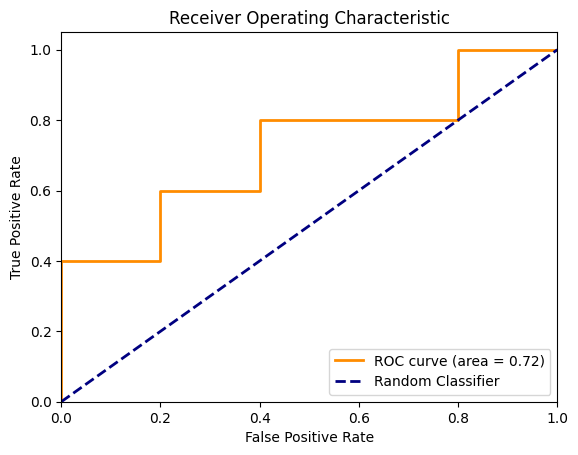

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()